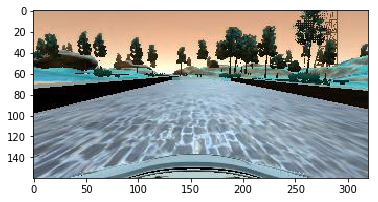

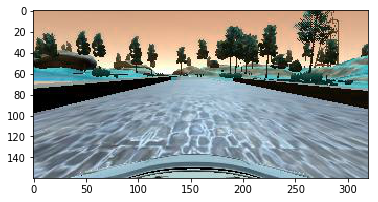

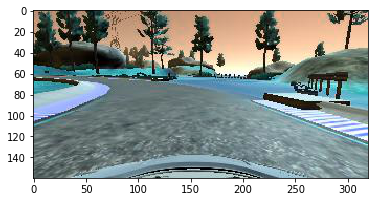

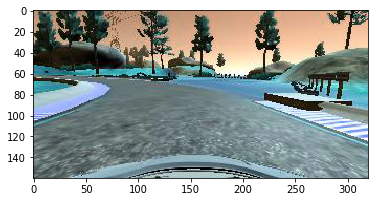

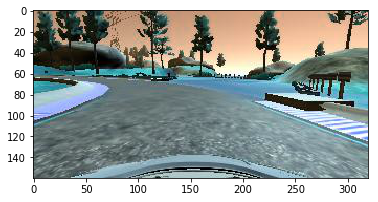

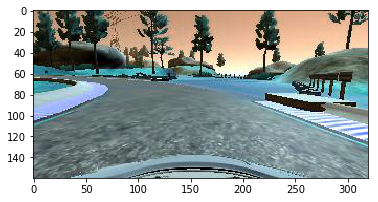

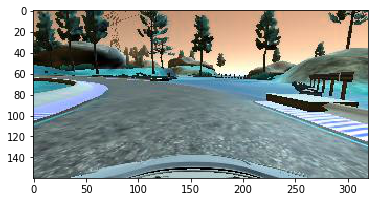

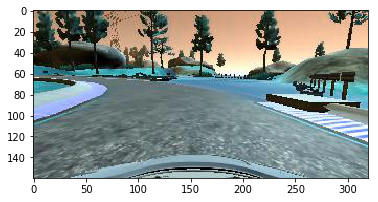

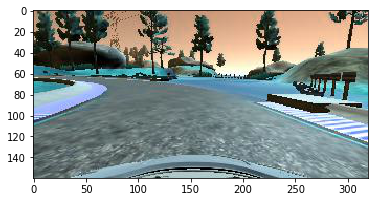

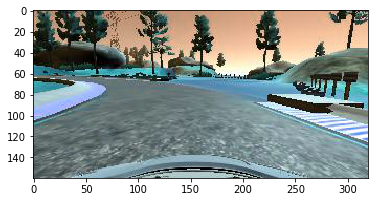

In [11]:
import csv
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


### Parameters
data_folder = 'data/'
skip_first = True
epochs = 5
use_lateral_images = False
flip_dataset = False


### Importing data
lines = []
with open(data_folder + '/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    first = True
    for row in reader:
        if not first:
            lines.append(row)
        else:
            first = False

images = []
steering_angles = []
for line in lines:
    # create adjusted steering measurements for the side camera images
    steering_center = float(line[3])
    correction = 0.2 # this is a parameter to tune
    steering_left = steering_center + correction
    steering_right = steering_center - correction

    # read in images from center, left and right cameras
    path = data_folder + 'IMG/'
    img_center = cv2.imread(path + line[0].split('/')[-1])
    img_left   = cv2.imread(path + line[1].split('/')[-1])
    img_right  = cv2.imread(path + line[2].split('/')[-1])

    # add images and angles to data set
    if use_lateral_images:
        images.extend((img_center, img_left, img_right))
        steering_angles.extend((steering_center, steering_left, steering_right))
    else:
        images.append(img_center)
        steering_angles.append(steering_center)
    

### Augment dataset
augmented_images = []
augmented_steering_angles = []
for image, steering_angle in zip(images, steering_angles):
    augmented_images.append(image)
    augmented_steering_angles.append(steering_angle)
    if flip_dataset:
        augmented_images.append(cv2.flip(image, 1))
        augmented_steering_angles.append(-1.*steering_angle)


for i in range(10):
    f, ax = plt.subplots()
    ax.imshow(augmented_images[i])

In [10]:
print(augmented_steering_angles)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0617599, 0.05219137, 0.05219137, 0.3679529, 0.5784606, 0.5784606, 0.1670138, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08089697, 0.0904655, 0.0904655, 0.1574452, 0.1765823, 0.1765823, 0.0, 0.0, 0.0, -0.0787459, -0.0787459, -0.0787459, -0.0787459, 0.0, 0.0, 0.0, 0.0, 0.05219137, 0.05219137, 0.0904655, 0.38709, 0.3583844, 0.05219137, 0.0, 0.0, 0.0, 0.0, 0.0, -0.03127411, -0.05975719, -0.05975719, -0.05975719, -0.05975719, -0.05975719, -0.05975719, -0.05975719, -0.05975719, -0.05975719, -0.05975719, -0.04076847, 0.0, 0.0, 0.01391724, 0.01391724, 0.01391724, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01391724, 0.1287396, 0.2148564, 0.2148564, 0.0, 0.0, 0.0, 0.0, 0.0, -0.08824026, -0.

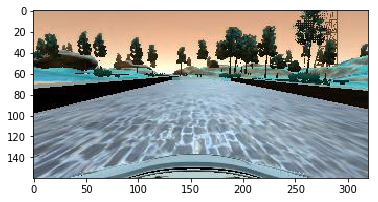

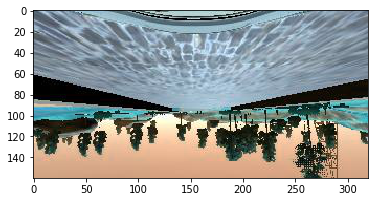

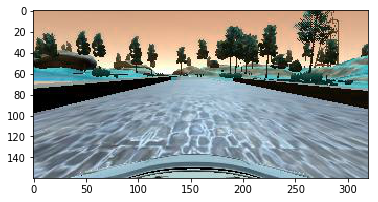

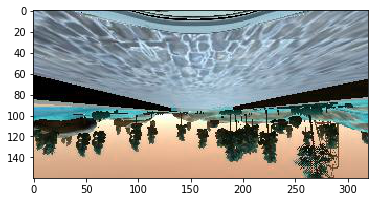

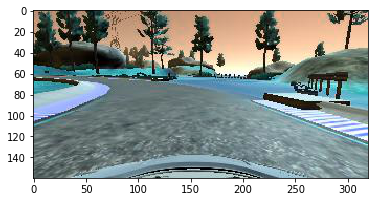

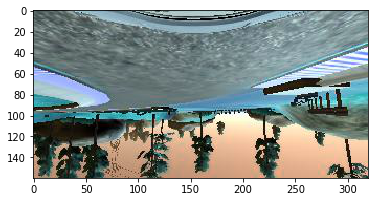

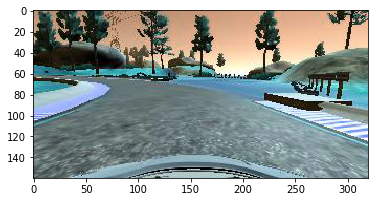

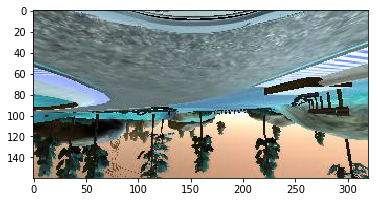

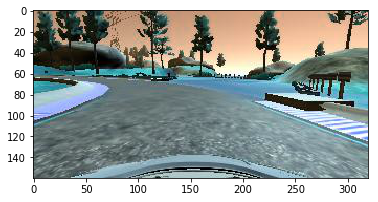

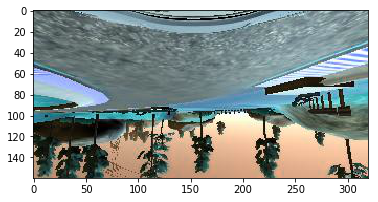

In [8]:
for i in range(10):
    f, ax = plt.subplots()
    ax.imshow(augmented_images[i])